In [1]:
import sys
sys.path.append('/home/despoB/dlurie/Software/infomap/examples/python/')

In [2]:
from infomap import infomap

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [4]:
import numpy as np

In [5]:
hcp_zmat = np.loadtxt('/home/despoB/dlurie/Projects/despolab_lesion/sandbox/hcp_mean_mat_z.txt')

In [6]:
np.fill_diagonal(hcp_zmat, 0.0)

In [7]:
hcp_zmat_pos = hcp_zmat.copy()

In [8]:
hcp_zmat_pos[hcp_zmat_pos < 0] = 0

In [9]:
G = nx.from_numpy_matrix(hcp_zmat_pos)

In [125]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapWrapper = infomap.Infomap("--two-level --silent --num-trials 250")

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges_iter():
        i,j = e
        i = int(i)
        j = int(j)
        infomapWrapper.addLink(i, j, G[i][j]['weight'])

    print("Find communities with Infomap...")
    infomapWrapper.run();

    tree = infomapWrapper.tree

    print("Found %d modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    communities = {}
    for node in tree.leafIter():
        communities[node.originalLeafIndex] = node.moduleIndex()

    nx.set_node_attributes(G, 'community', communities)
    return np.array(list(communities.values()))

In [126]:
membership = findCommunities(G)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 5 modules with codelength: 7.589130


In [135]:
membership = membership + 1

In [136]:
np.savetxt('/home/despoB/dlurie/Projects/despolab_lesion/sandbox/hcp_mean_best_partition-infomap_trials-250_NonNeg.txt', membership, fmt="%d")

In [109]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G, scale=0.7, k=0.1)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes_iter():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

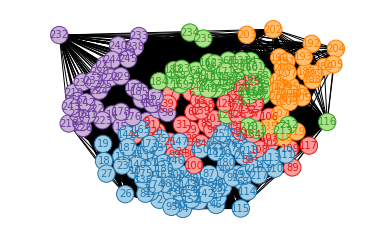

In [110]:
drawNetwork(G)

In [79]:
communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]

In [81]:
len(communities)

246

In [33]:
nx.write_weighted_edgelist(G, 'hcp_zmat_pos.edgelist')

In [ ]:
nx.adj_matrix()

In [ ]:
for n in G.nodes_iter():
    n.community
